<a href="https://colab.research.google.com/github/gitHubAndyLee2020/Transformer_Seq2Seq_Ko_En_Bidirectional_Translator/blob/main/test_translation_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kr_en_translation_ted_talk_dataset.zip to kr_en_translation_ted_talk_dataset.zip
Saving translated_dataset_no2_epochs_1_to_10.zip to translated_dataset_no2_epochs_1_to_10 (1).zip


In [3]:
!unzip kr_en_translation_ted_talk_dataset.zip

Archive:  kr_en_translation_ted_talk_dataset.zip
  inflating: multitarget-ted/en-ko/raw/ted_dev_en-ko.raw.en  
  inflating: multitarget-ted/en-ko/raw/ted_dev_en-ko.raw.ko  
  inflating: multitarget-ted/en-ko/raw/ted_test1_en-ko.raw.en  
  inflating: multitarget-ted/en-ko/raw/ted_test1_en-ko.raw.ko  
  inflating: multitarget-ted/en-ko/raw/ted_train_en-ko.raw.en  
  inflating: multitarget-ted/en-ko/raw/ted_train_en-ko.raw.ko  


In [4]:
!unzip translated_dataset_no2_epochs_1_to_10.zip

Archive:  translated_dataset_no2_epochs_1_to_10.zip
   creating: translated/
  inflating: translated/translated_ko_to_en_epoch_0.txt  
  inflating: translated/translated_en_to_ko_epoch_1.txt  
  inflating: translated/translated_ko_to_en_epoch_1.txt  
  inflating: translated/translated_en_to_ko_epoch_3.txt  
  inflating: translated/translated_ko_to_en_epoch_2.txt  
  inflating: translated/translated_en_to_ko_epoch_4.txt  
  inflating: translated/translated_en_to_ko_epoch_2.txt  
  inflating: translated/translated_ko_to_en_epoch_4.txt  
  inflating: translated/translated_ko_to_en_epoch_3.txt  
  inflating: translated/translated_en_to_ko_epoch_0.txt  
  inflating: translated/translated_en_to_ko_epoch_5.txt  
  inflating: translated/translated_ko_to_en_epoch_5.txt  
  inflating: translated/translated_en_to_ko_epoch_7.txt  
  inflating: translated/translated_ko_to_en_epoch_7.txt  
  inflating: translated/translated_en_to_ko_epoch_8.txt  
  inflating: translated/translated_en_to_ko_epoch_9.t

In [5]:
!pip install 'portalocker>=2.0.0'

In [6]:
!pip install -U torchdata
!pip install -U spacy
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download ko_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-10-23 05:04:50.275801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 05:04:51.281236:

In [7]:
FILE_PATH = 'multitarget-ted/en-ko/raw/'

In [8]:
from nltk.translate.bleu_score import sentence_bleu
from torchtext.data.utils import get_tokenizer

def load_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return [line.strip() for line in lines]

def evaluate_bleu(model_translated_file, actual_translated_file, ln):
    # Get tokenizer
    if ln == 'en':
        tokenizer = get_tokenizer('spacy', language='en_core_web_sm')
    elif ln == 'ko':
        tokenizer = get_tokenizer('spacy', language='ko_core_news_sm')
    else:
        print("Unsupported language")
        return

    # Load files
    model_translated_lines = load_file(model_translated_file)
    actual_translated_lines = load_file(actual_translated_file)

    # Check if lengths are equal
    if len(model_translated_lines) != len(actual_translated_lines):
        print("The number of lines in both files must be the same.")
        return

    bleu_scores = []

    for model_line, actual_line in zip(model_translated_lines, actual_translated_lines):
        # Tokenize text
        model_tokens = tokenizer(model_line.lower())
        actual_tokens = tokenizer(actual_line.lower())

        # Compute BLEU score
        bleu_score = sentence_bleu([actual_tokens], model_tokens)
        bleu_scores.append(bleu_score)

    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    return avg_bleu

In [10]:
avg_bleu_scores = []

for i in range(0, 10):
  # Example usage
  model_translated_file = f"translated/translated_en_to_ko_epoch_{i}.txt"
  actual_translated_file = FILE_PATH + "ted_test1_en-ko.raw.ko"
  ln = "ko"  # 'en' for English, 'ko' for Korean
  print(f"Testing translated English-to-Korean text at epoch {i}:")
  avg_bleu_ko = evaluate_bleu(model_translated_file, actual_translated_file, ln)
  print(f'Average BLEU score: {avg_bleu_ko * 100:.2f}')

  # Example usage
  model_translated_file = f"translated/translated_ko_to_en_epoch_{i}.txt"
  actual_translated_file = FILE_PATH + "ted_test1_en-ko.raw.en"
  ln = "en"  # 'en' for English, 'ko' for Korean
  print(f"Testing translated Korean-to-English text at epoch {i}:")
  avg_bleu_en = evaluate_bleu(model_translated_file, actual_translated_file, ln)
  print(f'Average BLEU score: {avg_bleu_en * 100:.2f}')

  avg_bleu_scores.append((avg_bleu_ko, avg_bleu_en))

Testing translated English-to-Korean text at epoch 0:
Average BLEU score: 0.15
Testing translated Korean-to-English text at epoch 0:
Average BLEU score: 0.33
Testing translated English-to-Korean text at epoch 1:
Average BLEU score: 0.13
Testing translated Korean-to-English text at epoch 1:
Average BLEU score: 0.36
Testing translated English-to-Korean text at epoch 2:
Average BLEU score: 0.22
Testing translated Korean-to-English text at epoch 2:
Average BLEU score: 0.48
Testing translated English-to-Korean text at epoch 3:
Average BLEU score: 0.39
Testing translated Korean-to-English text at epoch 3:
Average BLEU score: 0.45
Testing translated English-to-Korean text at epoch 4:
Average BLEU score: 0.34
Testing translated Korean-to-English text at epoch 4:
Average BLEU score: 0.61
Testing translated English-to-Korean text at epoch 5:
Average BLEU score: 0.41
Testing translated Korean-to-English text at epoch 5:
Average BLEU score: 0.62
Testing translated English-to-Korean text at epoch 6

In [13]:
import matplotlib.pyplot as plt

def plot_bleu_scores(avg_bleu_scores):
    # Extract the two sets of BLEU scores from the tuples
    scores_1, scores_2 = zip(*avg_bleu_scores)

    # Generate epochs
    epochs = list(range(1, len(avg_bleu_scores) + 1))

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, scores_1, marker='o', linestyle='-', label='English-to-Korean')
    plt.plot(epochs, scores_2, marker='x', linestyle='-', label='Korean-to-English')

    # Add titles and labels
    plt.title('Average BLEU Scores Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Avg Bleu Score')
    plt.xticks(epochs)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

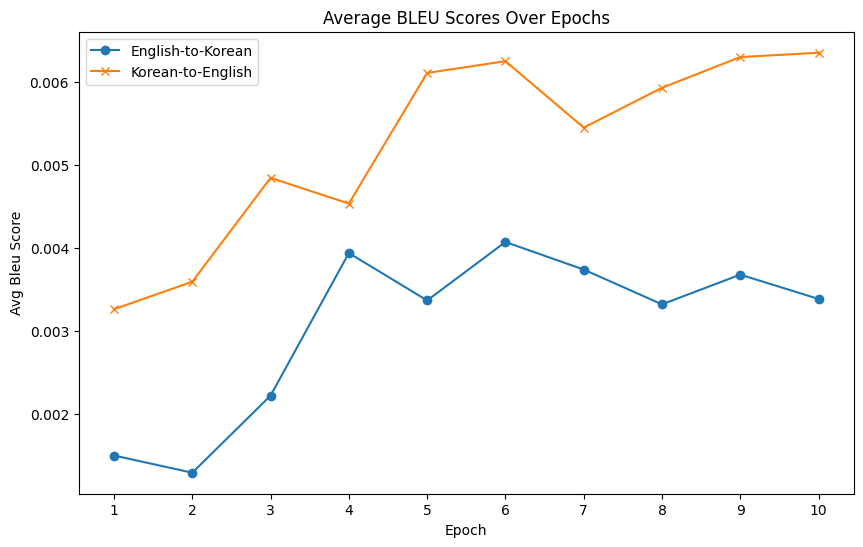

In [14]:
plot_bleu_scores(avg_bleu_scores)